In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_train = pd.read_csv(r'C:\Users\arieh\OneDrive\Documents\Arieh\snap folder\סימסטר ב שנה א\הדמיית נתונים\עבודת גמר\fashion-mnist_train.csv')
df_test = pd.read_csv(r'C:\Users\arieh\OneDrive\Documents\Arieh\snap folder\סימסטר ב שנה א\הדמיית נתונים\עבודת גמר\fashion-mnist_test.csv')


In [2]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


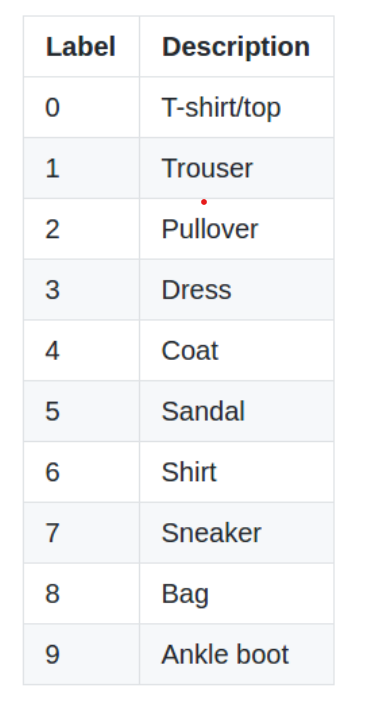

In [4]:
y_train = df_train.iloc[:,0]
x_train = df_train.iloc[:,1:]

y_test = df_test.iloc[:,0]
x_test = df_test.iloc[:,1:]

In [5]:
x_train = x_train.divide(other = 255)
x_test = x_test.divide(other=255)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pca.fit(x_train)
reduced = pd.DataFrame(pca.transform(x_train))

In [7]:
pca_test = PCA(n_components = 187)
pca_test.fit(x_test)
reduced_test = pd.DataFrame(pca.transform(x_test))

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

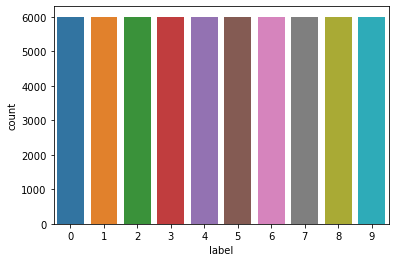

In [8]:
import seaborn as sns
g = sns.countplot(y_train)

y_train.value_counts()

In [9]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

### My data is very clean so I am moving onto model selection.

I have decided to use xgboost since it is a very strong boosting model and my data is very clean and I assume since my data is a classification dataset that xgboost will do a good job.

In [10]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(reduced, y_train)
model.score(reduced_test, y_test)

C:\Users\arieh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:34:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8829

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds = KFold(n_splits = 5, shuffle = True)
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=folds)
scores.mean()

[11:47:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\arieh\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[11:54:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:08:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:14:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.9015833333333333

My finla result is 88% using xgboost